In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd  
import seaborn as sns
import wget
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
url = "https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf"
filename = wget.download(url)
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')
style =pd.read_csv('condom.csv')
style.head()
style.info()

100% [..............................................................................] 98308 / 98308<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   Timestamp                                                            500 non-null    object
 1   allow                                                                500 non-null    object
 2   เพศ                                                                  500 non-null    object
 3   อายุ                                                                 500 non-null    object
 4   อาชีพ                                                                500 non-null    object
 5   1. รูปแบบการตกแต่งห้องนอนที่คุณชอบ                                   500 non-null    object
 6   2. รูปแบบชุดนอน

In [3]:
style_drop = style.drop(['Timestamp','allow'],axis = 1)
style_pre = style_drop.drop('15.กลิ่นที่คุณชื่นชอบจากผลิตภัณฑ์ถุงยางแบรนด์กำลังจะดัง Willy Billy',axis = 1)
style_result = style_drop['15.กลิ่นที่คุณชื่นชอบจากผลิตภัณฑ์ถุงยางแบรนด์กำลังจะดัง Willy Billy']

In [26]:
from sklearn.preprocessing import LabelEncoder
style_label = style_pre.apply(LabelEncoder().fit_transform)
style_label.iloc[:,10:11]

,8. เครื่องดื่มแอลกอฮอล์ที่คุณชื่นชอบ
0,12
1,12
2,9
3,12
4,8
...,...
495,7
496,11
497,11
498,11


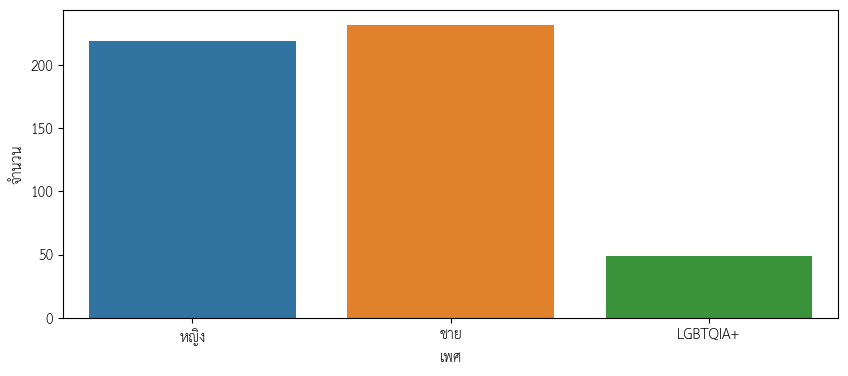

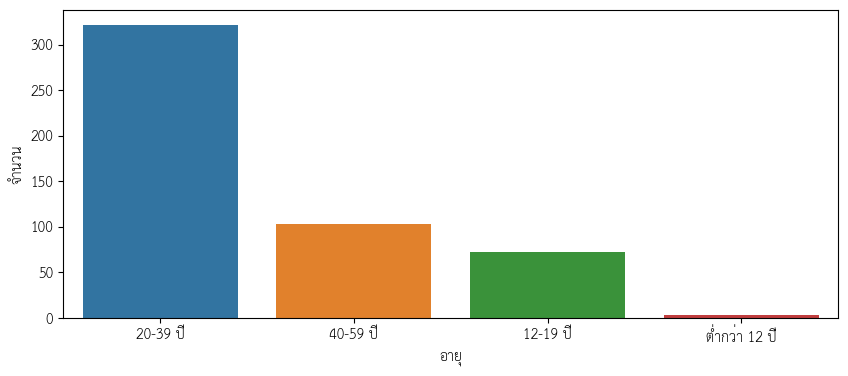

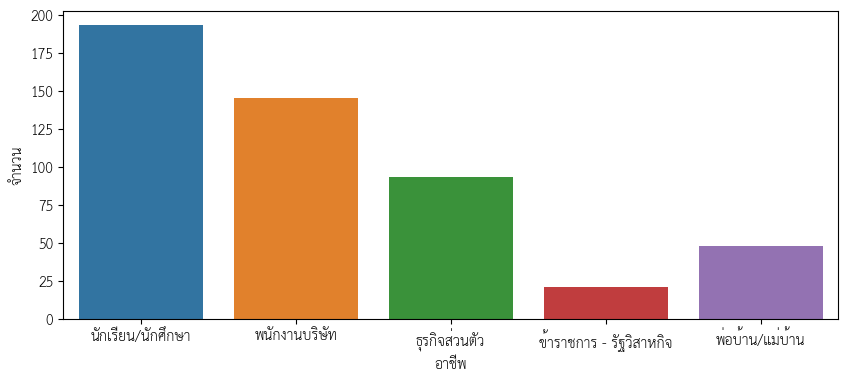

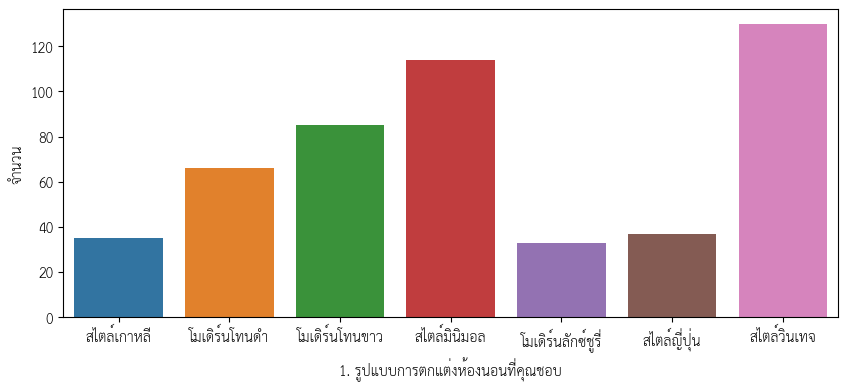

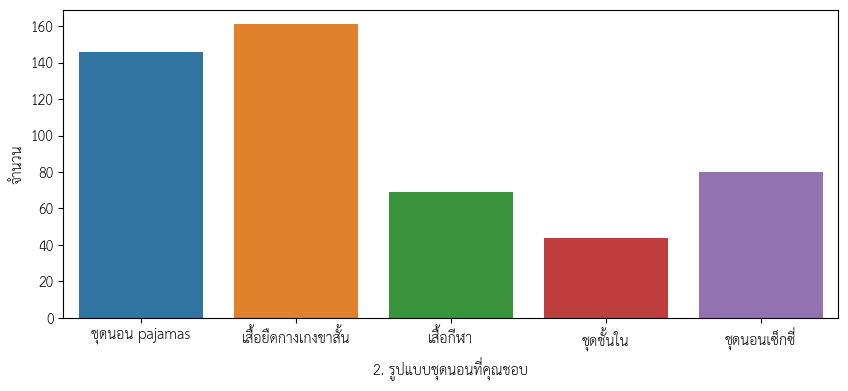

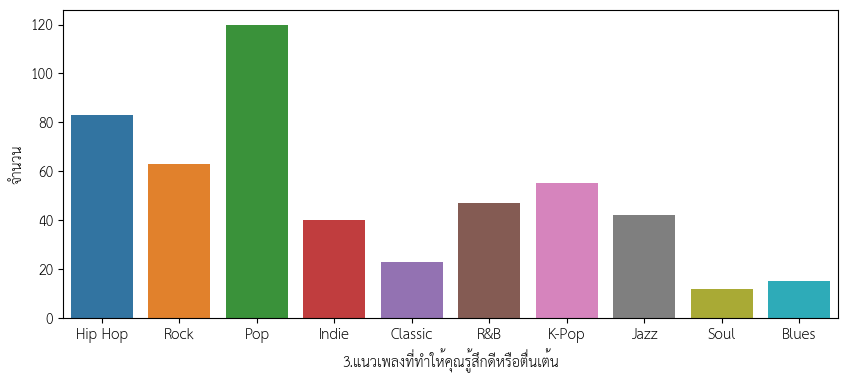

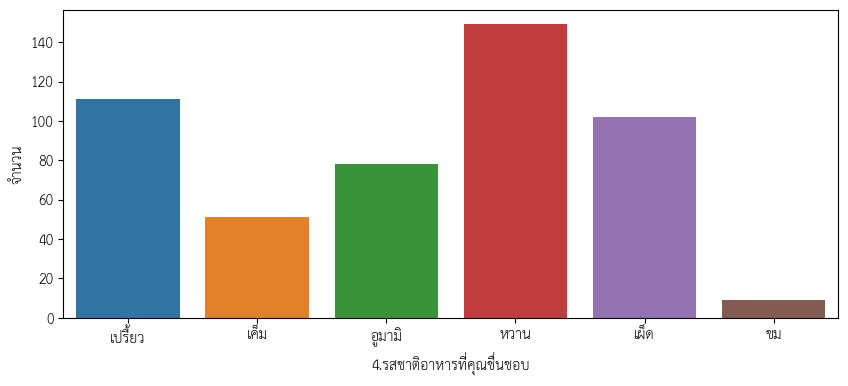

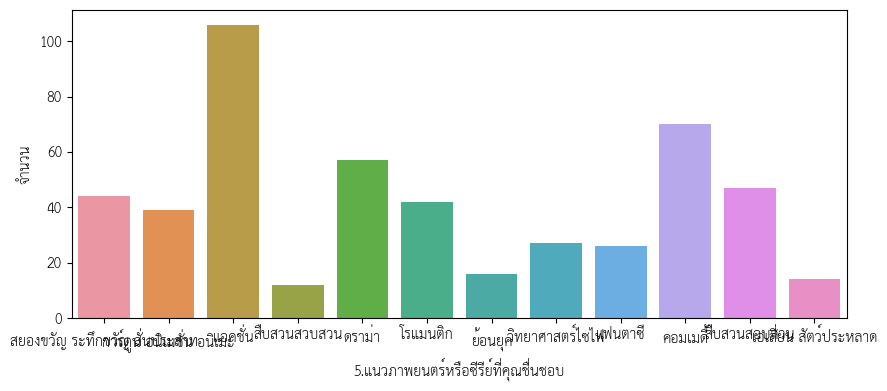

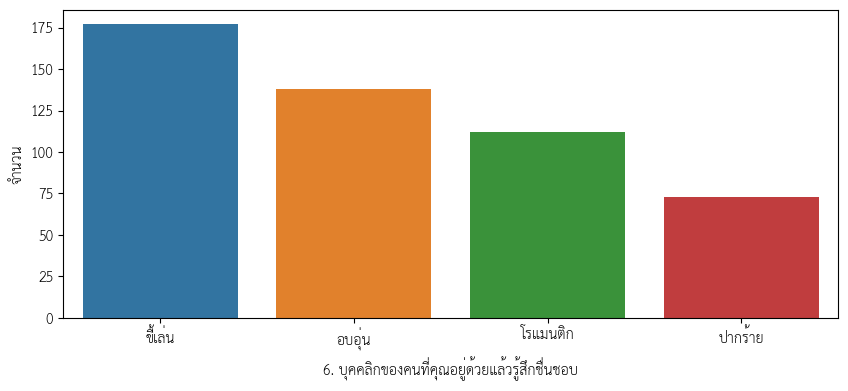

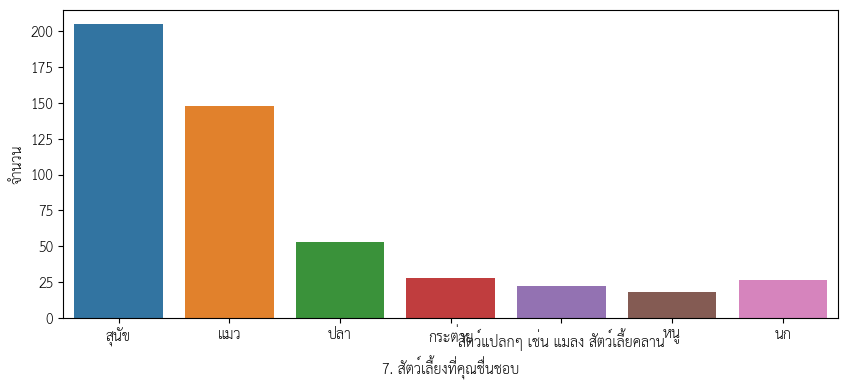

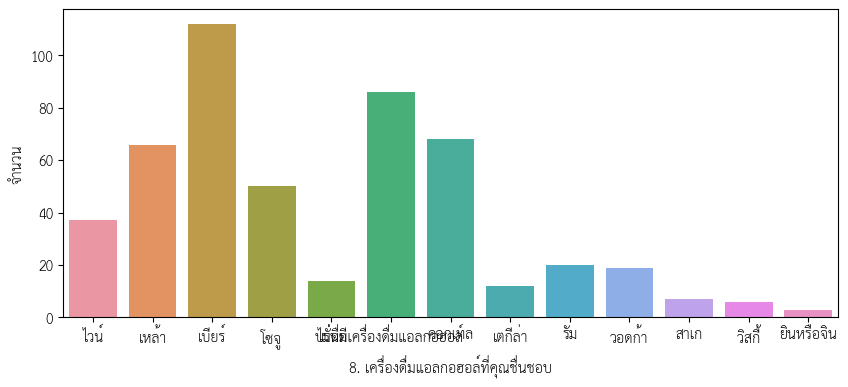

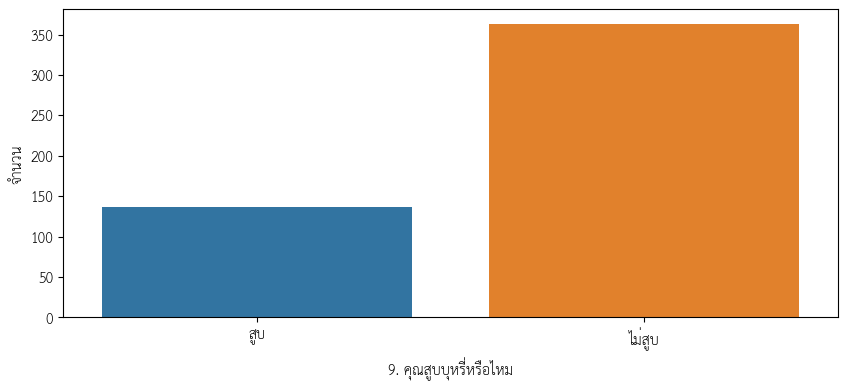

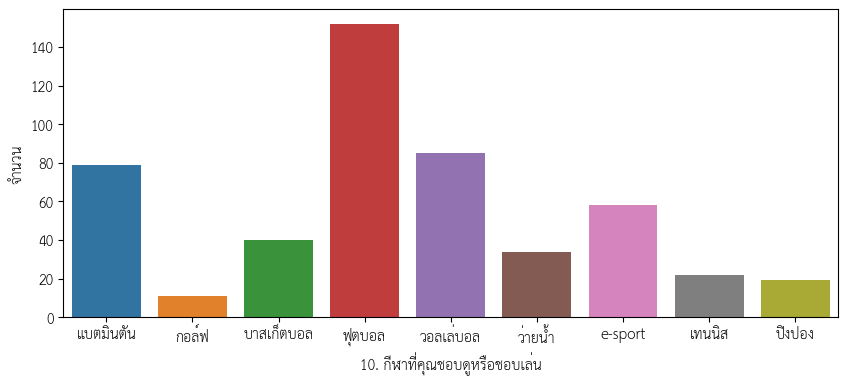

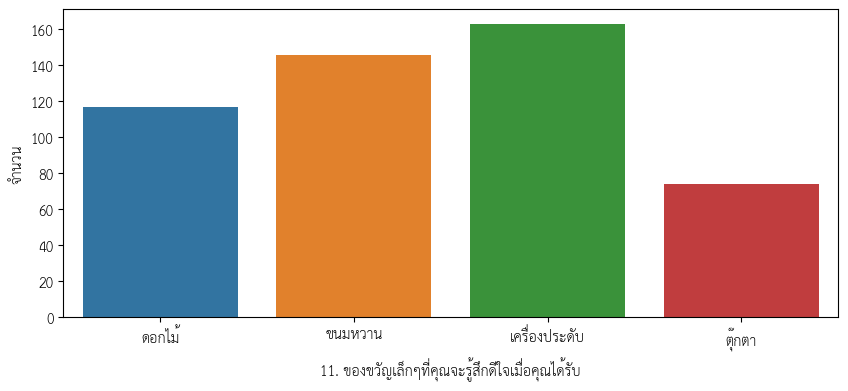

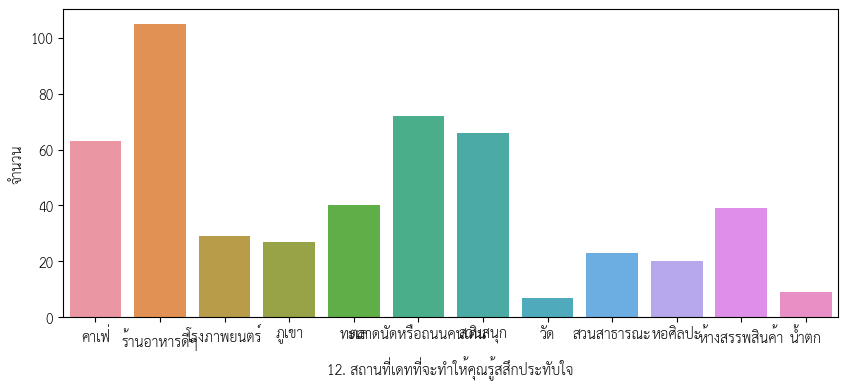

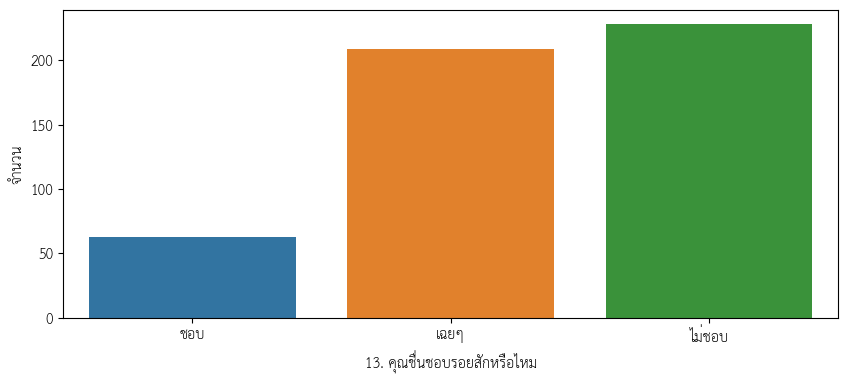

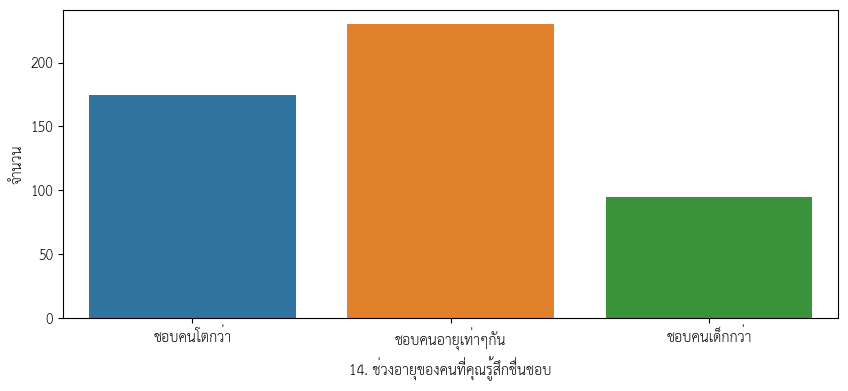

In [28]:
for feat in style_label:
    plt.figure(figsize=(10,4))
    sns.countplot(data=style, x=feat)
    plt.xlabel(feat)
    plt.ylabel("จำนวน")

In [19]:
X_train, X_test, y_train, y_test = train_test_split(style_label, style_result, test_size=0.3,random_state=94)

In [20]:
#Choose entrpy to be a criterion
clf = DecisionTreeClassifier(criterion="entropy", max_depth=None)
clf = clf.fit(X_train.values,y_train)
y_pred = clf.predict(X_test.values)
y_score = clf.score(style_label.values,style_result)

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

                     precision    recall  f1-score   support

        Banana-mint       1.00      1.00      1.00         1
  Breezy Watermelon       1.00      1.00      1.00         5
  Cannabis aromatic       0.56      1.00      0.71         5
  Chocolate Cookies       0.75      0.75      0.75         4
     Chocolate Mint       0.73      0.85      0.79        13
          Cola Lava       0.77      0.71      0.74        14
     Durian Sunrise       1.00      1.00      1.00         5
            Flowers       1.00      0.88      0.93         8
        Gummy Gummy       0.73      0.79      0.76        14
               Mint       1.00      0.89      0.94        18
             Orange       0.67      0.67      0.67         9
            Perfume       1.00      0.83      0.90        23
Strawberry Midnight       0.92      0.92      0.92        13
  Strawberry Yogurt       0.95      1.00      0.97        18

           accuracy                           0.86       150
          macro avg   

In [25]:
clf.predict([[0,2,4,1,3,1,1,0,3,3,2,1,1,1,3,2,0]])

array(['Banana-mint'], dtype=object)